In [1]:
import os
os.chdir('../')

In [19]:
from src.utils import load_data
import numpy as np

img_data, label_data = load_data(reshape=False, scale_percent=10, resize_only=True)
images = img_data
images = np.array(images)/255
labels = np.array(label_data)


Loading ../InsulatorsDataSet/03 Extraction/ images...
Loading ../InsulatorsDataSet/04 Extraction/ images...
Loading ../InsulatorsDataSet/05 Extraction/ images...
Loading ../InsulatorsDataSet/06 Extraction/ images...
Loading ../InsulatorsDataSet/07 Extraction/ images...
Loading ../InsulatorsDataSet/08 Extraction/ images...


In [20]:
import albumentations as A

transform = A.Compose([
    A.Rotate(limit = 360, border_mode = 1, p = 1)
])

def augmentation(images, labels, transform, spr):
  # spr: samples per image
    new_images = []
    new_labels = []
    for i in range(len(images)):
        # se agrega la imagen original
        new_images.append(images[i])
        # se agregan "spr" rotaciones de la imagen original
        for _ in range(spr):
            transformed = transform(image = images[i])
            transformed_img = transformed["image"]
            new_images.append(transformed_img)
        # Se agregan los mismos spr + 1 labels (las imagenes rotadas y la original!)
        new_labels += [labels[i]] * (spr + 1)
    return new_images, new_labels

samples_per_image = 10
new_images, new_labels = augmentation(images, labels, transform, samples_per_image)

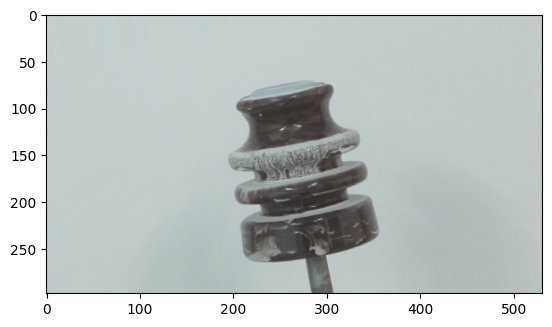

In [21]:
import matplotlib.pyplot as plt

plt.imshow(new_images[25])

In [22]:
cnt = 0
for img in new_images:
    cv.imwrite(f"data/scale_10/{new_labels[cnt]}_{cnt}.png", (img*255).astype(int))
    cnt+=1

In [23]:
import pickle
import cv2 as cv

In [24]:
with open("data_set_aumentado_scale_10.p", "wb") as f:
    pickle.dump([new_images, new_labels], f)

In [4]:
img_data, label_data = load_data(reshape=False, scale_percent=10, resize_only=True)
images = img_data

Loading ../InsulatorsDataSet/03 Extraction/ images...
Loading ../InsulatorsDataSet/04 Extraction/ images...
Loading ../InsulatorsDataSet/05 Extraction/ images...
Loading ../InsulatorsDataSet/06 Extraction/ images...
Loading ../InsulatorsDataSet/07 Extraction/ images...
Loading ../InsulatorsDataSet/08 Extraction/ images...
